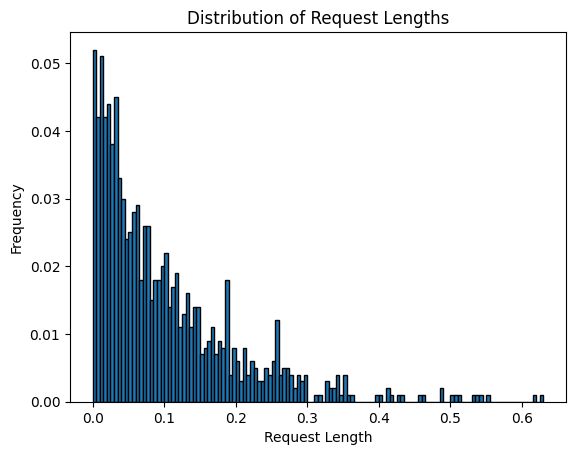

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open('output_mt.txt', 'r') as file:
    data = [float(line.strip()) for line in file]

bin_size = 0.005
bins = np.arange(0, max(data) + bin_size, bin_size)
weights = np.ones(len(data)) / 1000

plt.hist(data, bins=bins, weights=weights, edgecolor='black')
plt.title('Distribution of Request Lengths')
plt.xlabel('Request Length')
plt.ylabel('Frequency')

plt.show()

Text(0, 0.5, 'Frequency')

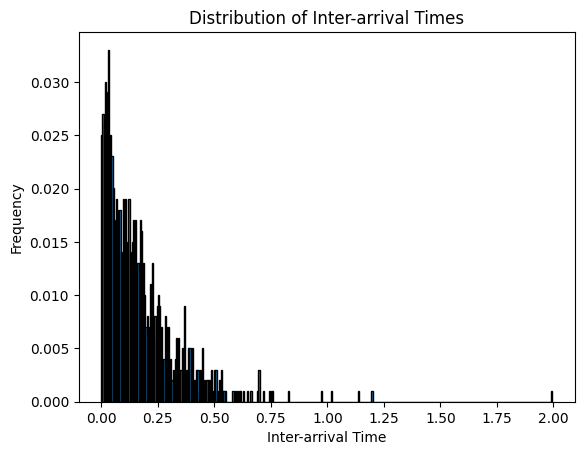

In [ ]:
with open('mt_inter-arrival.txt', 'r') as file:
  arrival_data = [float(line.strip()) for line in file]

inter_arrival_data = np.ones(len(arrival_data) - 1)

for i in range(len(inter_arrival_data)):
  inter_arrival_data[i] = arrival_data[i+1] - arrival_data[i]


bin_size = 0.005
bins = np.arange(0, max(inter_arrival_data) + bin_size, bin_size)
weights = np.ones(len(inter_arrival_data)) / 999

plt.hist(inter_arrival_data, bins=bins, weights=weights, edgecolor='black')
plt.title('Distribution of Inter-arrival Times')
plt.xlabel('Inter-arrival Time')
plt.ylabel('Frequency')



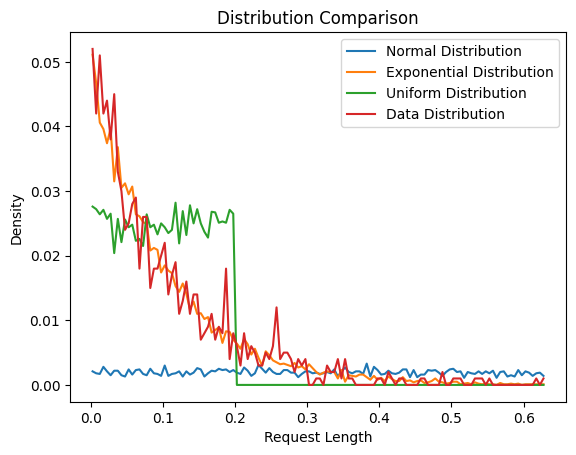

In [ ]:
# Problem C
# (1)

# Get samples from normal distribution
mu = 1/10
sigma = 1
normal_samples = np.random.normal(mu, sigma, 10000)

# Get samples from exponential distribution
exp_mean = 1/10
exp_samples = np.random.exponential(1/10, 10000)

# Get samples from uniform distribution
uniform_samples = np.random.uniform(0, 0.2, 10000)

# Normalize data and make bins
dist_weights = np.ones(10000) / 10000
data_weights = np.ones(1000) / 1000
dist_bin_size = 0.005
dist_bins = np.arange(0, max(data) + dist_bin_size, dist_bin_size)

# Get histogram data
norm_hist, _ = np.histogram(normal_samples, bins=dist_bins, weights=dist_weights)

exp_hist, _ = np.histogram(exp_samples, bins=dist_bins, weights=dist_weights)

uniform_hist, _ = np.histogram(uniform_samples, bins=dist_bins, weights=dist_weights)

data_hist, _ = np.histogram(data, bins=dist_bins, weights=data_weights)

# Get bin centers for plot
bin_centers = (dist_bins[:-1] + dist_bins[1:]) / 2


# Plot distributions
plt.plot(bin_centers, norm_hist, label="Normal Distribution")
plt.plot(bin_centers, exp_hist, label="Exponential Distribution")
plt.plot(bin_centers, uniform_hist, label="Uniform Distribution")
plt.plot(bin_centers, data_hist, label="Data Distribution")

plt.title("Distribution Comparison")
plt.xlabel("Request Length")
plt.ylabel("Density")
plt.legend()

plt.show()











The exponential distribution matches very well with the experimental data, so that is most likely the distribution that the data is following.

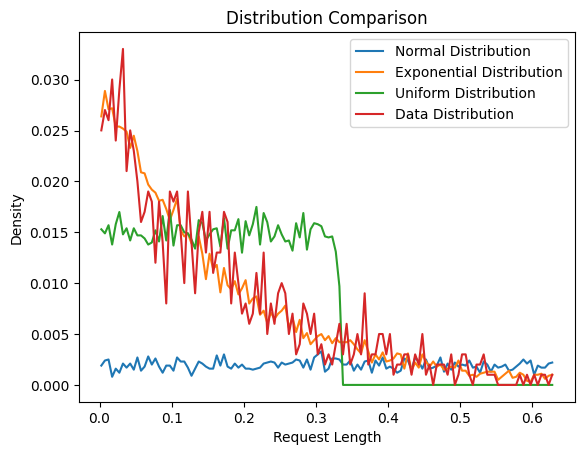

In [ ]:
# Problem D
# Get samples from normal distribution
mu = 1/6
sigma = 1
normal_samples = np.random.normal(mu, sigma, 10000)

# Get samples from exponential distribution
exp_mean = 1/6
exp_samples = np.random.exponential(exp_mean, 10000)

# Get samples from uniform distribution
uniform_samples = np.random.uniform(0, 1/3, 10000)

# Normalize data and make bins
dist_weights = np.ones(10000) / 10000
data_weights = np.ones(999) / 999
dist_bin_size = 0.005
dist_bins = np.arange(0, max(data) + dist_bin_size, dist_bin_size)

# Get histogram data
norm_hist, _ = np.histogram(normal_samples, bins=dist_bins, weights=dist_weights)

exp_hist, _ = np.histogram(exp_samples, bins=dist_bins, weights=dist_weights)

uniform_hist, _ = np.histogram(uniform_samples, bins=dist_bins, weights=dist_weights)

inter_arrival_hist, _ = np.histogram(inter_arrival_data, bins=dist_bins, weights=data_weights)

# Get bin centers for plot
bin_centers = (dist_bins[:-1] + dist_bins[1:]) / 2

# Plot distributions
plt.plot(bin_centers, norm_hist, label="Normal Distribution")
plt.plot(bin_centers, exp_hist, label="Exponential Distribution")
plt.plot(bin_centers, uniform_hist, label="Uniform Distribution")
plt.plot(bin_centers, inter_arrival_hist, label="Data Distribution")

plt.title("Distribution Comparison")
plt.xlabel("Request Length")
plt.ylabel("Density")
plt.legend()

plt.show()

Same as before, the exponential curve matches the experimental data very well. It appears that parameter -a controls the rate at which the client sends requests, or average time (the higher the faster), and -s controls the service time for the requests.

In [ ]:
# Problem 2
# a)
df1 = pd.read_csv("queue-lengths.txt", header=None, names=["Length", "Timestamp"])
df1["Time-Difference"] = df1["Timestamp"].shift(-1) - df1["Timestamp"]
total_time = 0
for i in range(len(df1["Time-Difference"]) - 1):
  total_time += df1["Time-Difference"][i]

avg_length = 0
for i in range(len(df1["Length"]) - 1):
  avg_length += df1["Length"][i] * df1["Time-Difference"][i] / total_time

print(avg_length)

4.878389477871997


In [ ]:
def output_to_df(output):
  column_names = [
      "RequestID",
      "ClientRequestTimestamp",
      "ClientRequestLength",
      "ReceiptTimestamp",
      "StartTimestamp",
      "CompletionTimestamp",
      "QueueLength"
  ]

  data = {col: [] for col in column_names}
  with open(output, "r") as file:
    for line in file:
      t = line.strip().split(",")
      if len(t) != 7:
        continue

      request_id, request_timestamp, length, receipt_timestamp, start_timestamp, completion_timestamp, queue_length = t
      data["RequestID"].append(request_id.strip())
      data["ClientRequestTimestamp"].append(float(request_timestamp.strip()))
      data["ClientRequestLength"].append(float(length.strip()))
      data["ReceiptTimestamp"].append(float(receipt_timestamp.strip()))
      data["StartTimestamp"].append(float(start_timestamp.strip()))
      data["CompletionTimestamp"].append(float(completion_timestamp.strip()))
      data["QueueLength"].append(float(queue_length.strip()))

    df = pd.DataFrame(data)

    total_busy_time = 0
    for i in range(len(df["ClientRequestLength"])):
      total_busy_time += (df["CompletionTimestamp"][i] - df["StartTimestamp"][i])

    total_time = df["CompletionTimestamp"].iloc[-1] - df["ClientRequestTimestamp"].iloc[0]

    utilization = total_busy_time / total_time

    queueingTime = df["StartTimestamp"] - df["ClientRequestTimestamp"]
    serviceTime = df["CompletionTimestamp"] - df["StartTimestamp"]
    df["ResponseTime"] = queueingTime + serviceTime

    df["QueueLengthTime"] = df["CompletionTimestamp"].shift(-1) - df["CompletionTimestamp"]

    avg_queue_length = 0
    for i in range(len(df["QueueLength"]) - 1):
      avg_queue_length += df["QueueLength"][i] * df["QueueLengthTime"][i] / total_time

    avg_response_time = df["ResponseTime"].mean()

    return utilization, avg_response_time, avg_queue_length, df









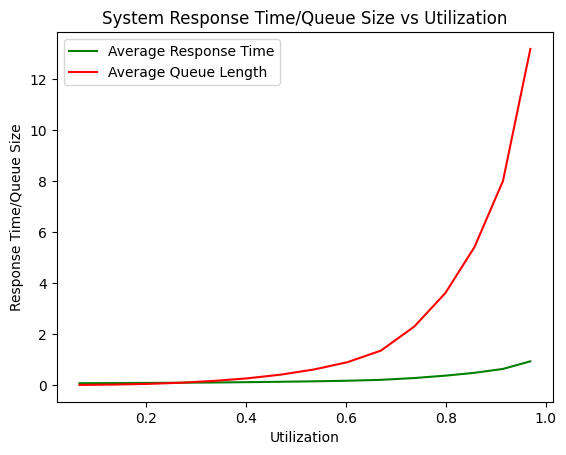

In [ ]:
utilization = [0] * 15
avg_response_time = [0] * 15
avg_queue_length = [0] * 15
for i in range(15):
  utilization[i], avg_response_time[i], avg_queue_length[i], _ = output_to_df(f"output{i}.txt")

fig, ax = plt.subplots()

ax.set_title("System Response Time/Queue Size vs Utilization")
ax.set_xlabel("Utilization")
ax.set_ylabel("Response Time/Queue Size")

ax.plot(utilization, avg_response_time, color="green", label="Average Response Time")
ax.plot(utilization, avg_queue_length, color="red", label="Average Queue Length")

ax.legend()

**Problem B**

It appears that both response time and queue size get larger as utilization gets larger. This makes sense because As the queue fills up the CPU will be working harder (more often) to empty it, and as it takes longer to get to each customer's request the response time will increase.

**Problem C**

It appears that there is a fixed proportional relationship between queue length and response time. This follow from Little's Law, which states $q = λ * T_q$, meaning the queue size ($q$) scales linearly with the response time ($T_q$).
